In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

In [117]:
file_path = 'dados/kc_house_data.csv'

In [118]:
data = pd.read_csv(file_path)

In [119]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [120]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [121]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [122]:
data['bedrooms'].fillna(1, inplace=True)

In [123]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [124]:
y = data.price

In [125]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<IPython.core.display.Javascript object>


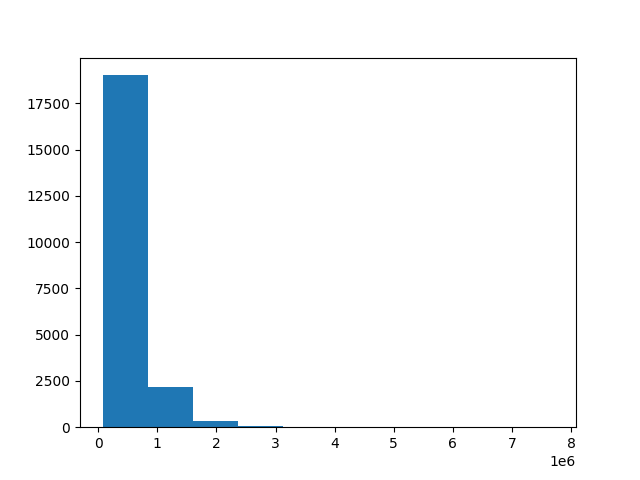

<AxesSubplot:>

In [126]:
%matplotlib notebook
y.hist(grid=False)

In [128]:
features = 'bedrooms bathrooms waterfront yr_built sqft_living'.split()

In [129]:
X = data[features]

In [130]:
X.head()

,bedrooms,bathrooms,waterfront,yr_built,sqft_living
0,3.0,1.00,0,1955,1180
1,3.0,2.25,0,1951,2570
2,2.0,1.00,0,1933,770
3,4.0,3.00,0,1965,1960
4,3.0,2.00,0,1987,1680


<IPython.core.display.Javascript object>


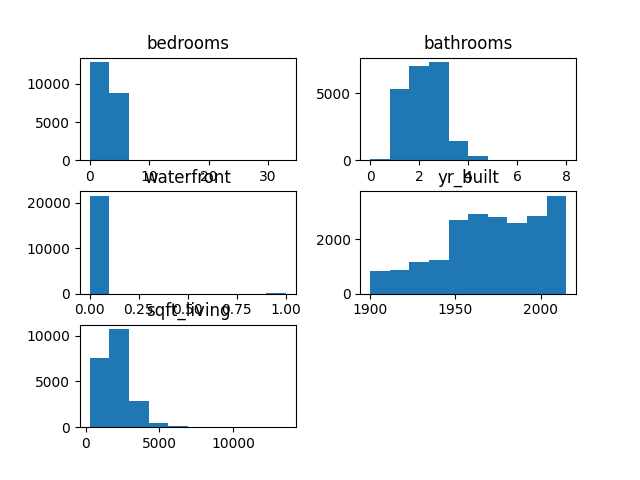

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>, <AxesSubplot:>]],
      dtype=object)

In [131]:
%matplotlib notebook
X.hist(grid=False)

In [132]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [133]:
model = DecisionTreeRegressor(random_state=1)

In [134]:
model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [135]:
preds = model.predict(val_X)

In [136]:
for p in preds[0:5]:
    print(p)

634500.0
475000.0
699800.0
420000.0
310000.0


In [137]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [138]:
y.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [139]:
val_mae = mean_absolute_error(preds, val_y)

In [140]:
val_mae

200667.4399518875

In [141]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    
    model.fit(train_X, train_y)
    
    val_pred = model.predict(val_X)
    
    mae = mean_absolute_error(val_pred, val_y)
    
    return mae

In [168]:
nodes = [5, 25, 50, 100, 250]

In [169]:
for n in nodes:
    mymae = get_mae(n, train_X, val_X, train_y, val_y)
    print(f'MAX_LEAF_NODES: {n}\t\t MAE: {mymae:.0f}')

MAX_LEAF_NODES: 5		 MAE: 180795
MAX_LEAF_NODES: 25		 MAE: 162626
MAX_LEAF_NODES: 50		 MAE: 160683
MAX_LEAF_NODES: 100		 MAE: 161067
MAX_LEAF_NODES: 250		 MAE: 162047


In [170]:
final_model = DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)

final_model.fit(X, y)

final_pred = final_model.predict(X.head())

for p in final_pred[0:5]:
    print(f'{p:.0f}')

383011
803032
288397
410060
410060


In [166]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64